In [1]:
library(data.table)
library(dplyr)
library(ggplot2)
library(ggpubr)
theme_set(theme_bw())

generate_ranks <- function(checkm_out, bin) {
    checkm_out[`Bin Id` %like% bin, binner:=bin]
    checkm_out[`Bin Id` %like% bin & Completeness >= 50 & Contamination <= 10, com_rank := frank(checkm_out[`Bin Id` %like% bin & Completeness >= 50 & Contamination <= 10], -Completeness, Contamination)]
    checkm_out[`Bin Id` %like% bin & Completeness >= 50 & Contamination <= 10, con_rank := frank(checkm_out[`Bin Id` %like% bin & Completeness >= 50 & Contamination <= 10], Contamination, -Completeness)]
}

generate_ranks_das <- function(checkm_out, bin) {
    checkm_out[, binner := bin]
    checkm_out[Completeness >= 50 & Contamination <= 10, com_rank := frank(checkm_out[Completeness >= 50 & Contamination <= 10], -Completeness, Contamination)]
    checkm_out[Completeness >= 50 & Contamination <= 10, con_rank := frank(checkm_out[Completeness >= 50 & Contamination <= 10], Contamination, -Completeness)]    
}

change_names <- function(checkm_out) {
    checkm_out[binner=='metabat2', binner:='MetaBAT2']
    checkm_out[binner=='metabat_sens', binner:='MetaBAT Sens.']
    checkm_out[binner=='metabat_ssens', binner:='MetaBAT SuperSens.']
    checkm_out[binner=='metabat_spec', binner:='MetaBAT Spec.']
    checkm_out[binner=='metabat_sspec', binner:='MetaBAT SuperSpec.']
    checkm_out[binner=='maxbin', binner:='MaxBin2']
    checkm_out[binner=='concoct', binner:='CONCOCT']
    checkm_out[binner=='vamb', binner:='VAMB']
    checkm_out[binner=='rosella', binner:='Rosella']
}

source('setup.R')
theme_set(theme_bw())


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [13]:
rosella_ret <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/rosella_bins_second/checkm.out')
# rosella_ret_c2 <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/rosella_bins_second/checkm2_out/quality_report.tsv')

ret_testing <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/assembly_test_2/data/checkm.out')
# das_tool_ret_orig <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/data/checkm.tsv')
das_tool_ret <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/checkm.out')
# all_bins_ret <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/all_bins/checkm.out')
# vamb_ret <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/data/vamb_bins/checkm.out')
m2_ret <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/metabat_test/checkm.out')

# das_tool_ret[, V2:=do.call(paste0,.SD), .SDcols=c(2, 3)]
# das_tool_ret[, V3:=NULL]
# colnames(das_tool_ret) <- colnames(all_bins_ret)
# colnames(all_bins_ret)
# colnames(das_tool_ret)

# fil_testing <- generate_plots('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning_testing_80/')
rosella_fil <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning_testing_80/data/rosella_bins/checkm.out')
das_tool_fil <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning_testing_80/bins/checkm.out')
m2_fil <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning/data/metabat_bins_2/checkm.out')
all_bins_fil <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning_testing_80/bins/all_bins/checkm.out')

# colnames(das_tool_fil) <- colnames(rosella_fil)

Warning message in fread("/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/rosella_bins_second/checkm.out"):
“File '/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/rosella_bins_second/checkm.out' has size 0. Returning a NULL data.table.”Warning message in fread("/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/metabat_test/checkm.out"):
“Discarded single-line footer: <<[2021-05-05 08:49:25] INFO: { Current stage: 0:00:18.591 || Total: 0:12:26.680 }>>”Warning message in fread("/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning/data/metabat_bins_2/checkm.out"):
“Discarded single-line footer: <<[2021-03-09 08:27:06] INFO: { Current stage: 0:00:06.179 || Total: 0:08:42.785 }>>”Warning message in fread("/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning_testing_80/bins/all_bi

In [416]:
rosella_ret <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/rosella_bins/checkm.out')
rosella_ret[Completeness>=95 & Contamination <= 5, .N]
rosella_ret[Completeness>=90 & Contamination <= 10, .N]
rosella_ret[Completeness>=80 & Contamination <= 10, .N]
rosella_ret[Completeness>=70 & Contamination <= 10, .N]
rosella_ret[Completeness>=50 & Contamination <= 10, .N]
rosella_ret[Contamination >= 10,]

all_bins_ret[binner %like% "MetaBAT2" & Completeness >= 70, ]
# generate_ranks_das(das_tool_ret, 'DASTool w/o Rosella')
# das_tool_ret[Completeness>=95 & Contamination <=5, .N]
# das_tool_ret[Completeness>=90 & Contamination <=10, .N]
rosella_ret[Completeness >= 50 & Contamination <= 10,]


[1] 14

[1] 31

[1] 36

[1] 41

[1] 50

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.144,root (UID1),5656,56,24,55,0,0,0,1,0,4.17,12.50,100.00
rosella_bin.31,k__Bacteria (UID203),5449,103,58,39,36,28,0,0,0,56.21,10.10,0.00
rosella_bin.78,o__Rhizobiales (UID3447),356,413,248,15,356,41,1,0,0,96.37,11.49,2.27


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
binned_contigs.1.metabat2,root (UID1),5656,56,24,0,1,55,0,0,0,100.00,95.83,0.00,MetaBAT2,NA,NA
binned_contigs.12.metabat2,p__Euryarchaeota (UID49),95,228,153,2,224,2,0,0,0,99.62,1.31,0.00,MetaBAT2,1.0,23.0
binned_contigs.18.metabat2,k__Bacteria (UID2982),88,230,148,11,212,7,0,0,0,94.69,4.73,0.00,MetaBAT2,16.0,43.0
binned_contigs.26.metabat2,k__Bacteria (UID2565),2921,143,88,4,139,0,0,0,0,96.52,0.00,0.00,MetaBAT2,11.0,3.0
binned_contigs.31.metabat2,k__Bacteria (UID1453),901,171,117,1,166,4,0,0,0,99.15,2.99,0.00,MetaBAT2,4.5,33.5
binned_contigs.34.metabat2,k__Bacteria (UID2570),433,270,179,2,268,0,0,0,0,98.88,0.00,0.00,MetaBAT2,7.0,1.0
binned_contigs.35.metabat2,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0.00,MetaBAT2,13.0,40.0
binned_contigs.39.metabat2,k__Bacteria (UID1452),924,163,110,1,155,5,2,0,0,99.09,6.73,9.09,MetaBAT2,6.0,48.0
binned_contigs.4.metabat2,c__Deltaproteobacteria (UID3216),83,247,155,10,235,2,0,0,0,94.46,1.29,0.00,MetaBAT2,18.0,22.0
binned_contigs.40.metabat2,k__Bacteria (UID1452),924,163,110,12,146,5,0,0,0,90.91,3.48,40.00,MetaBAT2,28.0,37.0


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.1,p__Proteobacteria (UID3880),1495,261,164,25,222,14,0,0,0,89.29,4.78,0.00
rosella_bin.10,k__Bacteria (UID1452),924,163,110,23,131,9,0,0,0,84.31,6.65,0.00
rosella_bin.100,k__Bacteria (UID1453),901,171,117,3,165,3,0,0,0,98.12,2.14,0.00
rosella_bin.103,k__Bacteria (UID2982),88,230,148,11,212,7,0,0,0,94.69,4.73,0.00
rosella_bin.104,k__Bacteria (UID2565),2921,143,88,10,129,4,0,0,0,90.84,4.55,0.00
rosella_bin.109,c__Betaproteobacteria (UID3888),323,387,234,1,379,7,0,0,0,99.57,0.53,42.86
rosella_bin.11,c__Deltaproteobacteria (UID3216),83,247,155,14,231,2,0,0,0,93.15,0.81,0.00
rosella_bin.115,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0.00
rosella_bin.12,k__Bacteria (UID1452),924,163,110,27,127,8,1,0,0,80.51,8.36,0.00
rosella_bin.126,k__Bacteria (UID2565),2921,149,91,8,140,1,0,0,0,91.21,0.55,0.00


In [14]:
ret_testing[Completeness>=95 & Contamination <= 5, .N]
ret_testing[Completeness>=90 & Contamination <= 10, .N]
ret_testing[Completeness>=80 & Contamination <= 10, .N]
ret_testing[Completeness>=70 & Contamination <= 10, .N]
ret_testing[Completeness>=50 & Contamination <= 10, .N]
ret_testing

[1] 12

[1] 26

[1] 32

[1] 37

[1] 45

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
concoct_bins.tsv.002_sub,root (UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
concoct_bins.tsv.005_sub,c__Deltaproteobacteria (UID3216),83,247,155,215,31,1,0,0,0,3.36,0.02,0.00
concoct_bins.tsv.007_sub,k__Bacteria (UID203),5449,104,58,91,13,0,0,0,0,18.97,0.00,0.00
concoct_bins.tsv.011,k__Bacteria (UID1452),924,151,101,42,105,3,0,1,0,63.77,5.94,22.22
concoct_bins.tsv.013,k__Bacteria (UID3187),2258,188,117,9,172,7,0,0,0,93.80,1.95,0.00
concoct_bins.tsv.017_sub,k__Bacteria (UID203),5449,104,58,102,2,0,0,0,0,0.31,0.00,0.00
concoct_bins.tsv.025_sub,k__Bacteria (UID203),5449,104,58,99,5,0,0,0,0,3.89,0.00,0.00
concoct_bins.tsv.030,k__Bacteria (UID3187),2258,188,117,21,165,2,0,0,0,87.49,1.71,0.00
concoct_bins.tsv.034_sub,k__Bacteria (UID2565),2921,143,88,10,129,4,0,0,0,90.84,4.55,0.00
concoct_bins.tsv.042_sub,k__Bacteria (UID2982),88,230,148,13,213,3,0,1,0,93.37,3.41,33.33


In [464]:
rosella_ret <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/02.2-retentate/binning_testing/data/rosella_bins/checkm.out')
rosella_ret[Completeness>=95 & Contamination <= 5, .N]
rosella_ret[Completeness>=90 & Contamination <= 10, .N]
rosella_ret[Completeness>=80 & Contamination <= 10, .N]
rosella_ret[Completeness>=70 & Contamination <= 10, .N]
rosella_ret[Completeness>=50 & Contamination <= 10, .N]
rosella_ret[Contamination >= 10,]

# m2_ret[Completeness>=90 & Contamination <= 10, .N]
# generate_ranks_das(das_tool_ret, 'DASTool w/o Rosella')
all_bins_ret[binner %like% "MetaBAT2" & `Bin Id` %like% '66' , ]
# das_tool_ret[Completeness>=95 & Contamination <=5, .N]
# das_tool_ret[Completeness>=90 & Contamination <=10, .N]
rosella_ret[Completeness >= 50 & Contamination <= 10,]


[1] 14

[1] 30

[1] 35

[1] 38

[1] 51

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.107,f__Rhodocyclaceae (UID3972),30,540,241,86,369,84,1,0,0,81.90,11.18,0.00
rosella_bin.110,p__Actinobacteria (UID1454),732,199,116,35,146,17,1,0,0,81.32,13.65,15.00
rosella_bin.45,o__Rhizobiales (UID3447),356,413,248,15,355,42,1,0,0,96.37,11.63,2.22


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
binned_contigs.66.metabat2,c__Betaproteobacteria (UID3971),223,425,211,150,273,2,0,0,0,57.99,0.36,0,MetaBAT2,45,9


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.104,k__Bacteria (UID1452),924,163,110,73,82,8,0,0,0,59.60,6.55,0.00
rosella_bin.111,p__Actinobacteria (UID1454),732,199,116,68,130,1,0,0,0,55.46,0.86,0.00
rosella_bin.112,k__Bacteria (UID1453),901,171,117,1,166,4,0,0,0,99.15,2.99,0.00
rosella_bin.114,f__Rhodobacteraceae (UID3361),46,654,332,30,615,7,2,0,0,94.54,1.68,23.08
rosella_bin.118,o__Rhizobiales (UID3642),107,485,316,51,422,12,0,0,0,86.39,2.80,41.67
rosella_bin.12,k__Bacteria (UID1452),924,151,101,59,92,0,0,0,0,53.26,0.00,0.00
rosella_bin.124,k__Bacteria (UID1453),901,171,117,3,165,3,0,0,0,98.12,2.14,0.00
rosella_bin.125,k__Bacteria (UID1453),901,171,117,92,79,0,0,0,0,50.28,0.00,0.00
rosella_bin.127,c__Betaproteobacteria (UID3971),223,425,211,150,273,2,0,0,0,57.99,0.36,0.00
rosella_bin.128,c__Betaproteobacteria (UID3888),323,387,234,1,379,7,0,0,0,99.57,0.53,42.86


In [459]:
rosella_fil <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning_testing_80/data/rosella_bins/checkm.out')

rosella_fil[Completeness >= 95 & Contamination <= 5, .N]
rosella_fil[Completeness >= 90 & Contamination <= 10, .N]
rosella_fil[Completeness >= 80 & Contamination <= 10, .N]
rosella_fil[Completeness >= 70 & Contamination <= 10, .N]
rosella_fil[Completeness >= 50 & Contamination <= 10, .N]
rosella_fil[Completeness >= 50,]
rosella_fil[Completeness <= 50,]

das_tool_fil[Completeness >= 50]

[1] 4

[1] 8

[1] 9

[1] 10

[1] 17

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.17,p__Firmicutes (UID239),1324,173,101,52,120,1,0,0,0,61.43,0.50,0.00
rosella_bin.28,k__Bacteria (UID2569),434,278,186,139,135,4,0,0,0,50.68,1.00,0.00
rosella_bin.29,c__Betaproteobacteria (UID3959),235,420,211,145,261,12,2,0,0,62.61,3.81,0.00
rosella_bin.36,k__Bacteria (UID2565),2921,152,93,59,92,1,0,0,0,50.85,0.18,0.00
rosella_bin.4,p__Firmicutes (UID239),1324,175,101,46,128,1,0,0,0,68.13,0.03,0.00
rosella_bin.48,k__Bacteria (UID2565),2921,149,91,9,138,2,0,0,0,93.00,1.65,0.00
rosella_bin.56,k__Bacteria (UID1452),924,163,110,55,103,5,0,0,0,74.90,3.36,0.00
rosella_bin.60,f__Rhodobacteraceae (UID3361),46,654,332,77,543,34,0,0,0,87.43,5.20,32.35
rosella_bin.63,k__Bacteria (UID2982),88,230,148,12,214,3,0,1,0,93.41,3.41,33.33
rosella_bin.90,p__Euryarchaeota (UID49),95,228,153,1,225,2,0,0,0,99.67,1.31,0.00


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.10,root (UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
rosella_bin.11,k__Bacteria (UID203),5449,104,58,87,17,0,0,0,0,10.02,0.00,0.00
rosella_bin.13,k__Bacteria (UID203),5449,104,58,98,6,0,0,0,0,8.62,0.00,0.00
rosella_bin.14,root (UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
rosella_bin.15,k__Bacteria (UID2570),433,270,179,229,41,0,0,0,0,13.74,0.00,0.00
rosella_bin.16,k__Bacteria (UID203),5449,104,58,101,3,0,0,0,0,4.31,0.00,0.00
rosella_bin.18,k__Bacteria (UID2570),433,273,183,142,130,1,0,0,0,42.25,0.55,0.00
rosella_bin.19,k__Bacteria (UID203),5449,104,58,89,15,0,0,0,0,15.85,0.00,0.00
rosella_bin.2,k__Bacteria (UID2495),2993,147,91,117,30,0,0,0,0,13.19,0.00,0.00
rosella_bin.23,k__Bacteria (UID203),5449,104,58,102,2,0,0,0,0,0.50,0.00,0.00


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
concoct_bins.tsv.008_sub,k__Bacteria (UID2565),2921,143,88,35,104,4,0,0,0,68.57,3.98,0.00,DASTool w/o Rosella,10,13
concoct_bins.tsv.010,k__Bacteria (UID1452),924,161,108,10,150,1,0,0,0,91.20,0.93,0.00,DASTool w/o Rosella,8,3
concoct_bins.tsv.022,p__Euryarchaeota (UID49),95,228,153,1,225,2,0,0,0,99.67,1.31,0.00,DASTool w/o Rosella,1,5
concoct_bins.tsv.037,k__Bacteria (UID2570),433,270,179,4,263,3,0,0,0,98.04,1.68,0.00,DASTool w/o Rosella,3,7
concoct_bins.tsv.038,k__Bacteria (UID1452),924,163,110,11,150,1,1,0,0,92.42,1.27,0.00,DASTool w/o Rosella,7,4
concoct_bins.tsv.042,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0.00,DASTool w/o Rosella,4,12
concoct_bins.tsv.045,k__Bacteria (UID2329),174,149,89,40,105,4,0,0,0,64.58,3.53,0.00,DASTool w/o Rosella,13,11
maxbin_bins.tsv.005,k__Bacteria (UID1452),924,163,110,1,157,3,2,0,0,99.09,4.91,11.11,DASTool w/o Rosella,2,14
maxbin_bins.tsv.007,k__Bacteria (UID2565),2921,149,91,9,138,2,0,0,0,93.00,1.65,0.00,DASTool w/o Rosella,6,6
maxbin_bins.tsv.008_sub,k__Bacteria (UID2982),88,230,148,12,214,3,0,1,0,93.41,3.41,33.33,DASTool w/o Rosella,5,10


In [858]:
peter_sample <- fread('/work/microbiome/abisko/rhys/01-projects/99-temp/rosella_bins_second/checkm.out')
peter_sample[Completeness >= 95 & Contamination <= 5, .N]
peter_sample[Completeness >= 90 & Contamination <= 10, .N]
peter_sample[Completeness >= 80 & Contamination <= 10, .N]
peter_sample[Completeness >= 70 & Contamination <= 10, .N]
peter_sample[Completeness >= 50 & Contamination <= 10, .N]
peter_sample[Completeness >= 50,]

Warning message in fread("/work/microbiome/abisko/rhys/01-projects/99-temp/rosella_bins_second/checkm.out"):
“Discarded single-line footer: <<[2021-08-26 13:31:25] INFO: { Current stage: 0:00:40.406 || Total: 0:17:54.570 }>>”

[1] 0

[1] 2

[1] 3

[1] 9

[1] 21

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.108,o__Cytophagales (UID2937),44,474,330,192,240,42,0,0,0,55.36,8.85,40.48
rosella_bin.117,k__Bacteria (UID2982),88,227,146,82,143,2,0,0,0,74.16,1.03,100.00
rosella_bin.13,k__Bacteria (UID203),5449,103,58,17,18,27,25,15,1,88.40,119.56,82.67
rosella_bin.139,k__Bacteria (UID203),5449,104,58,18,42,43,1,0,0,84.80,50.78,8.70
rosella_bin.154,k__Bacteria (UID203),5449,104,58,36,39,18,7,3,1,63.40,46.25,74.63
rosella_bin.158,k__Bacteria (UID203),5449,104,58,25,45,30,3,0,1,73.84,35.74,44.90
rosella_bin.161,o__Actinomycetales (UID1696),455,315,190,58,233,21,3,0,0,78.09,7.38,23.33
rosella_bin.169,k__Bacteria (UID203),5449,104,58,28,58,17,1,0,0,68.84,7.24,15.00
rosella_bin.188,k__Bacteria (UID2982),88,230,148,100,124,6,0,0,0,58.24,1.58,0.00
rosella_bin.195,o__Burkholderiales (UID4001),108,570,250,105,213,167,62,23,0,79.04,59.44,30.75


Warning message:
“Removed 77 row(s) containing missing values (geom_path).”Warning message:
“Removed 77 row(s) containing missing values (geom_path).”Warning message:
“Removed 77 row(s) containing missing values (geom_path).”

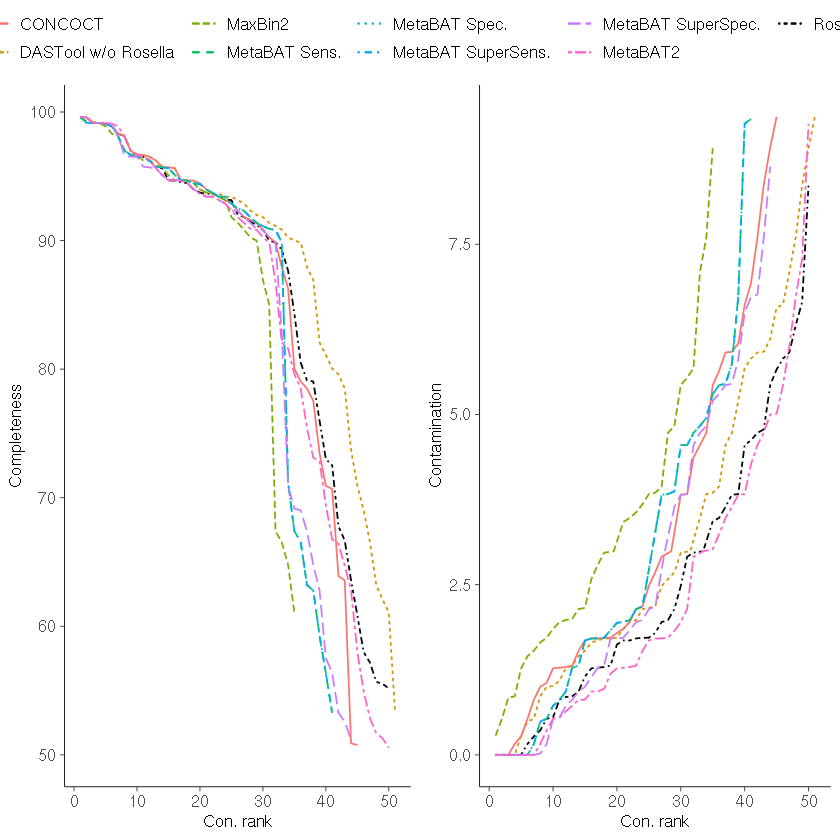

In [417]:
# rosella_ret[Completeness >= 95 & Contamination <= 5, .N]
# rosella_ret[Completeness >= 90 & Contamination <= 10, .N]
# rosella_ret[Completeness >= 70 & Contamination <= 10, .N]
# rosella_ret[Completeness >= 50 & Contamination <= 10, .N]
# rosella_ret[, .N]
# rosella_ret[Completeness >= 50,]

generate_ranks_das(rosella_ret, 'rosella')
generate_ranks(all_bins_ret, 'metabat2')
generate_ranks(all_bins_ret, 'metabat_sens')
generate_ranks(all_bins_ret, 'metabat_ssens')
generate_ranks(all_bins_ret, 'metabat_spec')
generate_ranks(all_bins_ret, 'metabat_sspec')
generate_ranks(all_bins_ret, 'maxbin')
generate_ranks(all_bins_ret, 'concoct')
# generate_ranks(all_bins_ret, 'rosella')
# generate_ranks_das(vamb_ret, 'VAMB')
# generate_ranks_das(m2_ret, 'redo')
generate_ranks_das(das_tool_ret, 'DASTool w/o Rosella')
change_names(all_bins_ret)
change_names(rosella_ret)
adj_names = sort(unique(setdiff(c(all_bins_ret$binner, 'DASTool w/o Rosella'), 'Rosella')))
values = gg_color_hue(length(adj_names))
names(values) = adj_names
values = c(values, c(Rosella="#000000"))

# rosella_med[Completeness >= 50 & Contamination <= 10, com_rank:=frank(rosella_med[Completeness >= 50 & Contamination <= 10,], -Completeness, Contamination)]
# rosella_med[Completeness >= 50 & Contamination <= 10, con_rank:=frank(rosella_med[Completeness >= 50 & Contamination <= 10,], Contamination, -Completeness)]

ret_com <- ggplot() + 
    geom_line(data=rosella_ret[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner, linetype=binner)) +
    geom_line(data=das_tool_ret[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner, linetype=binner)) + 
    geom_line(data=all_bins_ret[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner, linetype=binner)) +
#     scale_linetype_manual(values = c(1, 2, 1, 1, 1, 1, 1, 1, 1)) +
    scale_colour_manual(values=values) +
    labs(x="Con. rank", color="Binner", y="Completeness", linetype="Binner") +
    theme(axis.text=element_text(size=10),
          axis.title=element_text(size=10),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          legend.position="bottom" ,
          legend.direction="horizontal", 
          legend.title=element_blank(),
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())

ret_con <- ggplot() + 
    geom_line(data=rosella_ret[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner, linetype=binner)) +
    geom_line(data=das_tool_ret[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner, linetype=binner)) + 
    geom_line(data=all_bins_ret[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner, linetype=binner)) +
#     scale_linetype_manual(values = c(1, 2, 1, 1, 1, 1, 1, 1, 1)) +
    scale_colour_manual(values=values) +
    labs(x="Con. rank", color="Binner", y="Contamination", linetype="Binner") +
    theme(axis.text=element_text(size=10),
          axis.title=element_text(size=10),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          legend.position="bottom" ,
          legend.direction="horizontal", 
          legend.title=element_blank(),
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())

ggarrange(ret_com, ret_con, common.legend=TRUE)
# ggsave("anme_ret.tiff", units="in", width=10, height=6, dpi=600)

In [6]:
adj_names = sort(unique(setdiff(c(all_bins_ret$binner), 'Rosella')))
values = gg_color_hue(length(adj_names))
names(values) = adj_names
values = c(values, c(Rosella="#000000"))
values

Rosella 
"#F8766D" "#000000"

In [130]:
rosella_ret[`Bin Id` %like% '75']
das_tool_ret[Completeness >= 95 & Contamination <= 5,]

rosella_ret[Completeness >= 95 & Contamination <= 5, ]
das_tool_ret[Completeness >= 90 & Contamination <= 10,]
das_tool_ret[`Bin Id` %like% '006',]


rosella_ret[Completeness >= 40 & Contamination <= 10, ]
m2_ret[Completeness >= 50 & Completeness < 70 & Contamination <=10,]
rosella_ret[Contamination >=10,]


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.175,root (UID1),5656,56,24,56,0,0,0,0,0,0.00,0.0,0
rosella_bin.275,root (UID1),5656,56,24,56,0,0,0,0,0,0.00,0.0,0
rosella_bin.75,o__Burkholderiales (UID4000),193,426,214,274,149,3,0,0,0,33.45,1.4,0


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
concoct_bins.tsv.006,c__Betaproteobacteria (UID3971),223,425,211,13,402,9,1,0,0,95.75,2.18,0.00,DASTool w/o Rosella,14.0,26.0
concoct_bins.tsv.034,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0.00,DASTool w/o Rosella,16.0,34.0
concoct_bins.tsv.036,p__Actinobacteria (UID1454),732,199,116,6,191,2,0,0,0,96.98,1.72,0.00,DASTool w/o Rosella,9.0,20.0
concoct_bins.tsv.055,k__Bacteria (UID2570),433,270,179,2,268,0,0,0,0,98.88,0.00,0.00,DASTool w/o Rosella,6.0,1.0
concoct_bins.tsv.072_sub,k__Bacteria (UID1453),901,171,117,1,166,4,0,0,0,99.15,2.99,0.00,DASTool w/o Rosella,3.5,31.5
maxbin_bins.tsv.002,k__Bacteria (UID2570),433,270,179,6,263,1,0,0,0,96.65,0.28,0.00,DASTool w/o Rosella,11.0,5.0
maxbin_bins.tsv.003,k__Bacteria (UID2565),2921,149,91,3,144,2,0,0,0,96.70,1.65,0.00,DASTool w/o Rosella,10.0,16.0
maxbin_bins.tsv.005,k__Bacteria (UID1453),901,171,117,1,167,1,2,0,0,99.15,3.85,14.29,DASTool w/o Rosella,5.0,35.0
maxbin_bins.tsv.012,p__Actinobacteria (UID1454),732,199,116,7,189,3,0,0,0,95.69,2.16,0.00,DASTool w/o Rosella,15.0,25.0
maxbin_bins.tsv.013_sub,k__Bacteria (UID2565),2921,152,93,3,145,3,1,0,0,98.32,3.94,16.67,DASTool w/o Rosella,7.0,36.0


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.159,k__Bacteria (UID1453),901,171,117,3,165,3,0,0,0,98.12,2.14,0
rosella_bin.172,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0
rosella_bin.194,k__Bacteria (UID2565),2921,152,93,3,146,3,0,0,0,98.32,1.79,0
rosella_bin.245,k__Bacteria (UID2570),433,270,179,2,268,0,0,0,0,98.88,0.00,0
rosella_bin.278,k__Bacteria (UID2570),433,270,179,8,259,3,0,0,0,96.23,1.68,0
rosella_bin.279,p__Actinobacteria (UID1454),732,199,116,6,191,2,0,0,0,96.98,1.72,0
rosella_bin.280,k__Bacteria (UID2565),2921,143,88,4,139,0,0,0,0,96.52,0.00,0
rosella_bin.282,p__Actinobacteria (UID1454),732,199,116,7,190,2,0,0,0,95.69,1.72,0
rosella_bin.283,p__Euryarchaeota (UID49),95,228,153,2,224,2,0,0,0,99.62,1.31,0
rosella_bin.285,k__Bacteria (UID2570),433,270,179,6,264,0,0,0,0,96.65,0.00,0


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
concoct_bins.tsv.006,c__Betaproteobacteria (UID3971),223,425,211,13,402,9,1,0,0,95.75,2.18,0.00,DASTool w/o Rosella,14.0,26.0
concoct_bins.tsv.012,p__Proteobacteria (UID3880),1495,261,164,20,224,17,0,0,0,92.34,6.61,0.00,DASTool w/o Rosella,28.0,46.0
concoct_bins.tsv.021,k__Bacteria (UID3187),2258,188,117,8,173,7,0,0,0,94.66,1.95,0.00,DASTool w/o Rosella,18.0,22.0
concoct_bins.tsv.030,k__Bacteria (UID1452),924,163,110,9,152,1,1,0,0,93.64,1.27,0.00,DASTool w/o Rosella,22.0,12.0
concoct_bins.tsv.034,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0.00,DASTool w/o Rosella,16.0,34.0
concoct_bins.tsv.036,p__Actinobacteria (UID1454),732,199,116,6,191,2,0,0,0,96.98,1.72,0.00,DASTool w/o Rosella,9.0,20.0
concoct_bins.tsv.054,k__Bacteria (UID3187),2258,188,117,12,174,2,0,0,0,92.88,1.71,0.00,DASTool w/o Rosella,27.0,18.0
concoct_bins.tsv.055,k__Bacteria (UID2570),433,270,179,2,268,0,0,0,0,98.88,0.00,0.00,DASTool w/o Rosella,6.0,1.0
concoct_bins.tsv.072_sub,k__Bacteria (UID1453),901,171,117,1,166,4,0,0,0,99.15,2.99,0.00,DASTool w/o Rosella,3.5,31.5
maxbin_bins.tsv.002,k__Bacteria (UID2570),433,270,179,6,263,1,0,0,0,96.65,0.28,0.00,DASTool w/o Rosella,11.0,5.0


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
concoct_bins.tsv.006,c__Betaproteobacteria (UID3971),223,425,211,13,402,9,1,0,0,95.75,2.18,0.00,DASTool w/o Rosella,14,26
maxbin_bins.tsv.006,k__Bacteria (UID1452),924,151,101,40,108,3,0,0,0,66.54,2.97,66.67,DASTool w/o Rosella,47,30
metabat_bins_sens.tsv.006_sub,k__Bacteria (UID1452),924,163,110,10,148,5,0,0,0,93.41,4.55,0.00,DASTool w/o Rosella,24,37
vamb_bins.tsv.006_sub,k__Bacteria (UID1452),924,163,110,61,100,2,0,0,0,62.09,1.09,0.00,DASTool w/o Rosella,49,11


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.122,k__Bacteria (UID3187),2258,188,117,12,173,3,0,0,0,92.88,2.56,0.00
rosella_bin.124,k__Bacteria (UID2565),2921,143,88,10,129,4,0,0,0,90.84,4.55,0.00
rosella_bin.125,f__Rhodocyclaceae (UID3972),30,540,241,92,426,22,0,0,0,80.12,3.10,0.00
rosella_bin.133,k__Bacteria (UID2565),2921,149,91,8,139,2,0,0,0,91.21,1.65,0.00
rosella_bin.138,p__Actinobacteria (UID1454),732,199,116,99,100,0,0,0,0,58.05,0.00,0.00
rosella_bin.141,p__Actinobacteria (UID1454),732,199,116,50,145,4,0,0,0,68.53,2.59,0.00
rosella_bin.143,f__Rhodobacteraceae (UID3361),46,654,332,30,615,7,2,0,0,94.54,1.68,23.08
rosella_bin.155,k__Bacteria (UID1453),901,171,117,32,138,1,0,0,0,75.99,0.85,0.00
rosella_bin.159,k__Bacteria (UID1453),901,171,117,3,165,3,0,0,0,98.12,2.14,0.00
rosella_bin.163,c__Betaproteobacteria (UID3888),323,387,234,119,264,4,0,0,0,61.54,0.10,50.00


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
binned_contigs.17,k__Bacteria (UID1452),924,161,108,85,72,4,0,0,0,51.69,3.24,0
binned_contigs.19,k__Bacteria (UID2142),169,316,236,137,177,2,0,0,0,50.55,0.64,50
binned_contigs.27,c__Alphaproteobacteria (UID3422),26,529,308,191,335,3,0,0,0,64.72,0.81,0
binned_contigs.3,k__Bacteria (UID1452),924,151,101,43,108,0,0,0,0,62.78,0.00,0
binned_contigs.33,o__Burkholderiales (UID4000),193,426,214,113,307,6,0,0,0,69.88,0.93,0
binned_contigs.59,k__Bacteria (UID1453),901,171,117,88,83,0,0,0,0,52.85,0.00,0
binned_contigs.66,c__Betaproteobacteria (UID3971),223,425,211,150,273,2,0,0,0,57.99,0.36,0
binned_contigs.69,c__Gammaproteobacteria (UID4267),119,544,284,159,379,6,0,0,0,66.40,0.97,0
binned_contigs.73,k__Bacteria (UID1452),924,163,110,66,95,2,0,0,0,66.76,1.82,0
binned_contigs.79,k__Bacteria (UID1452),924,151,101,62,89,0,0,0,0,51.28,0.00,0


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.149,o__Rhizobiales (UID3447),356,413,248,15,356,41,1,0,0,96.37,11.49,2.27
rosella_bin.154,root (UID1),5656,56,24,0,1,55,0,0,0,100.00,95.83,7.27
rosella_bin.186,k__Bacteria (UID203),5449,104,58,0,2,102,0,0,0,100.00,97.41,0.00
rosella_bin.83,k__Bacteria (UID1452),924,163,110,66,71,26,0,0,0,62.87,17.37,19.23


[1] 4

[1] 8

[1] 10

[1] 18

[1] 56

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.10,k__Bacteria (UID2495),2993,147,91,35,111,1,0,0,0,66.92,1.10,0.00
rosella_bin.15,k__Bacteria (UID2569),434,278,186,138,136,4,0,0,0,51.22,1.00,0.00
rosella_bin.16,p__Firmicutes (UID239),1324,173,101,52,120,1,0,0,0,61.43,0.50,0.00
rosella_bin.2,k__Bacteria (UID2565),2921,152,93,41,108,3,0,0,0,67.52,2.33,0.00
rosella_bin.36,c__Betaproteobacteria (UID3959),235,420,211,154,256,8,2,0,0,60.06,3.39,0.00
rosella_bin.41,k__Bacteria (UID2565),2921,149,91,9,138,2,0,0,0,93.00,1.65,0.00
rosella_bin.47,k__Bacteria (UID1452),924,163,110,55,104,4,0,0,0,74.90,2.45,0.00
rosella_bin.52,f__Rhodobacteraceae (UID3361),46,654,332,83,546,25,0,0,0,86.13,4.70,40.00
rosella_bin.55,k__Bacteria (UID2982),88,230,148,12,214,3,0,1,0,93.41,3.41,33.33
rosella_bin.7,p__Firmicutes (UID239),1324,175,101,46,128,1,0,0,0,68.13,0.03,0.00


[1] "here"


Warning message:
“Removed 12 row(s) containing missing values (geom_path).”Warning message:
“Removed 12 row(s) containing missing values (geom_path).”Warning message:
“Removed 12 row(s) containing missing values (geom_path).”

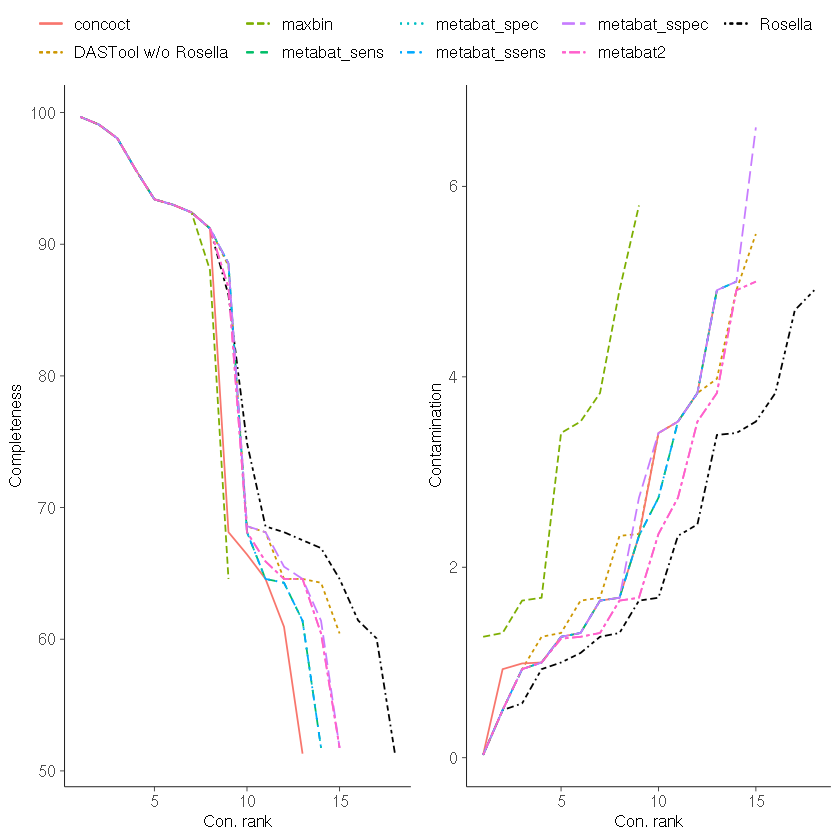

In [415]:
rosella_fil <- fread('/work2/microbiome/abisko/rhys/01-projects/02-anme/02-longreads/01.1-filtrate/binning_testing_80/data/rosella_bins/checkm.out')

rosella_fil[Completeness >= 95 & Contamination <= 5, .N]
rosella_fil[Completeness >= 90 & Contamination <= 10, .N]
rosella_fil[Completeness >= 70 & Contamination <= 10, .N]
rosella_fil[Completeness >= 50 & Contamination <= 10, .N]
rosella_fil[, .N]
rosella_fil[Completeness >= 50 ,]
generate_ranks_das(rosella_fil, 'Rosella')
# generate_ranks_das(das_tool_fil, 'DASTool w/o Rosella')
generate_ranks(all_bins_fil, 'metabat2')
generate_ranks(all_bins_fil, 'metabat_sens')
generate_ranks(all_bins_fil, 'metabat_ssens')
generate_ranks(all_bins_fil, 'metabat_spec')
generate_ranks(all_bins_fil, 'metabat_sspec')
generate_ranks(all_bins_fil, 'maxbin')
generate_ranks(all_bins_fil, 'concoct')
generate_ranks_das(m2_fil, 'metabat2')
# generate_ranks(all_bins_fil, 'rosella')
adj_names = sort(unique(setdiff(c(all_bins_fil$binner, 'DASTool w/o Rosella'), 'Rosella')))
values = gg_color_hue(length(adj_names))
names(values) = adj_names
values = c(values, c(Rosella="#000000"))


das_tool_fil[Completeness >= 50 & Contamination <= 10, com_rank := frank(das_tool_fil[Completeness >= 50 & Contamination <= 10], -Completeness, Contamination)]
# das_tool_fil

generate_ranks_das(das_tool_fil, 'DASTool w/o Rosella')
print("here")
fil_com <- ggplot() + 
    geom_line(data=rosella_fil[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner, linetype=binner)) +
    geom_line(data=m2_fil[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner, linetype=binner)) +
    geom_line(data=das_tool_fil[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner, linetype=binner)) +
    geom_line(data=all_bins_fil[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner, linetype=binner)) +
#     scale_linetype_manual(values = c(1, 2, 1, 1, 1, 1, 1, 1, 1)) +
    scale_colour_manual(values=values) +
    labs(x="Con. rank", color="Binner", y="Completeness", linetype="Binner") +
    theme(axis.text=element_text(size=10),
          axis.title=element_text(size=10),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          legend.position="bottom" ,
          legend.direction="horizontal", 
          legend.title=element_blank(),
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())

fil_con <- ggplot() + 
    geom_line(data=rosella_fil[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner, linetype=binner)) +
    geom_line(data=m2_fil[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner, linetype=binner)) +
    geom_line(data=das_tool_fil[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner, linetype=binner)) +
    geom_line(data=all_bins_fil[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner, linetype=binner)) +
#     scale_linetype_manual(values = c(1, 2, 1, 1, 1, 1, 1, 1, 1)) +
    scale_colour_manual(values=values) +
    labs(x="Con. rank", color="Binner", y="Contamination", linetype="Binner") +
    theme(axis.text=element_text(size=10),
          axis.title=element_text(size=10),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          legend.position="bottom" ,
          legend.direction="horizontal", 
          legend.title=element_blank(),
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())

ggarrange(fil_com, fil_con, common.legend=TRUE)
# ggsave("anme_filt.tiff", units="in", width=10, height=6, dpi=600)

In [12]:
rosella_fil[Completeness >= 95 & Contamination <= 5, .N]
rosella_fil[Completeness >= 90 & Contamination <= 10, .N]
rosella_fil[Completeness >= 70 & Contamination <= 10, .N]
rosella_fil[Completeness >= 50 & Contamination <= 10, .N]
rosella_fil[Completeness >= 40 & Contamination <= 10, .N]


all_bins_fil[`Bin Id` %like% "metabat2" & Completeness >= 95 & Contamination <= 5, .N ]
all_bins_fil[`Bin Id` %like% "metabat2" & Completeness >= 90 & Contamination <= 10, .N ]
all_bins_fil[`Bin Id` %like% "metabat2" & Completeness >= 70 & Contamination <= 10, .N ]
all_bins_fil[`Bin Id` %like% "metabat2" & Completeness >= 50 & Contamination <= 10, .N ]
all_bins_fil[`Bin Id` %like% "metabat2" & Completeness >= 40 & Contamination <= 10, .N ]

das_tool_fil[Completeness >= 90 & Contamination <= 5, .N]
das_tool_fil[Completeness >= 80 & Contamination <= 10, .N]
das_tool_fil[Completeness >= 70 & Contamination <= 10, .N]
das_tool_fil[Completeness >= 50 & Contamination <= 10, .N]

# all_bins_fil[`Bin Id` %like% "rosella" & Completeness >= 90 & Contamination <= 5, .N ]
# all_bins_fil[`Bin Id` %like% "rosella" & Completeness >= 90 & Contamination <= 10, .N ]
# all_bins_fil[`Bin Id` %like% "rosella" & Completeness >= 70 & Contamination <= 10, .N ]
# all_bins_fil[`Bin Id` %like% "rosella" & Completeness >= 50 & Contamination <= 10, .N ]

m2_fil[Completeness >= 40 ,]
rosella_fil[Completeness >= 40 ,]
das_tool_fil[Completeness >= 40, ]
rosella_fil[`Bin Id` %like% '178']

[1] 4

[1] 6

[1] 8

[1] 14

[1] 18

[1] 4

[1] 8

[1] 9

[1] 15

[1] 16

[1] 8

[1] 9

[1] 9

[1] 15

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
binned_contigs.1,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0.00,metabat2,4,13
binned_contigs.11,k__Bacteria (UID2570),433,270,179,4,263,3,0,0,0,98.04,1.68,0.00,metabat2,3,9
binned_contigs.13,k__Bacteria (UID2569),434,278,186,137,137,4,0,0,0,51.75,1.00,0.00,metabat2,15,4
binned_contigs.15,k__Bacteria (UID2565),2921,152,93,43,107,2,0,0,0,65.91,1.25,0.00,metabat2,11,5
binned_contigs.17,f__Rhodobacteraceae (UID3361),46,654,332,81,547,26,0,0,0,86.73,5.00,42.31,metabat2,9,15
binned_contigs.20,k__Bacteria (UID203),5449,104,58,5,74,16,9,0,0,93.81,20.75,62.79,metabat2,NA,NA
binned_contigs.24,p__Firmicutes (UID239),1324,173,101,53,119,1,0,0,0,60.44,0.50,0.00,metabat2,14,2
binned_contigs.25,p__Firmicutes (UID239),1324,175,101,46,128,1,0,0,0,68.13,0.03,0.00,metabat2,10,1
binned_contigs.26,k__Bacteria (UID2565),2921,149,91,9,138,2,0,0,0,93.00,1.65,0.00,metabat2,6,8
binned_contigs.28,k__Bacteria (UID2982),88,227,146,119,103,5,0,0,0,45.08,3.08,0.00,metabat2,NA,NA


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
rosella_bin.19,k__Bacteria (UID2569),434,278,186,146,128,4,0,0,0,48.71,1.00,0.00,Rosella,NA,NA
rosella_bin.25,k__Bacteria (UID2982),88,230,148,64,163,3,0,0,0,71.11,1.38,0.00,Rosella,8,8
rosella_bin.30,k__Bacteria (UID1452),924,161,108,94,66,1,0,0,0,44.05,0.93,0.00,Rosella,NA,NA
rosella_bin.34,k__Bacteria (UID2495),2993,147,91,35,111,1,0,0,0,66.92,1.10,0.00,Rosella,10,5
rosella_bin.39,f__Rhodobacteraceae (UID3361),46,654,332,77,547,30,0,0,0,87.43,3.99,33.33,Rosella,7,12
rosella_bin.47,p__Firmicutes (UID239),1324,173,101,53,119,1,0,0,0,61.40,0.50,0.00,Rosella,13,2
rosella_bin.52,k__Bacteria (UID203),5449,103,58,65,37,1,0,0,0,53.28,0.34,0.00,Rosella,14,1
rosella_bin.54,k__Bacteria (UID203),5449,104,58,5,74,16,9,0,0,93.81,20.75,62.79,Rosella,NA,NA
rosella_bin.61,k__Bacteria (UID203),5449,104,58,73,30,1,0,0,0,42.24,1.72,0.00,Rosella,NA,NA
rosella_bin.74,k__Bacteria (UID203),5449,104,58,60,40,4,0,0,0,63.10,6.03,0.00,Rosella,12,14


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
concoct_bins.tsv.003_sub,k__Bacteria (UID2982),88,227,146,121,103,3,0,0,0,44.40,1.71,0.00,DASTool w/o Rosella,NA,NA
concoct_bins.tsv.008_sub,k__Bacteria (UID2565),2921,143,88,35,104,4,0,0,0,68.57,3.98,0.00,DASTool w/o Rosella,10,13
concoct_bins.tsv.010,k__Bacteria (UID1452),924,161,108,10,150,1,0,0,0,91.20,0.93,0.00,DASTool w/o Rosella,8,3
concoct_bins.tsv.022,p__Euryarchaeota (UID49),95,228,153,1,225,2,0,0,0,99.67,1.31,0.00,DASTool w/o Rosella,1,5
concoct_bins.tsv.037,k__Bacteria (UID2570),433,270,179,4,263,3,0,0,0,98.04,1.68,0.00,DASTool w/o Rosella,3,7
concoct_bins.tsv.038,k__Bacteria (UID1452),924,163,110,11,150,1,1,0,0,92.42,1.27,0.00,DASTool w/o Rosella,7,4
concoct_bins.tsv.042,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0.00,DASTool w/o Rosella,4,12
concoct_bins.tsv.045,k__Bacteria (UID2329),174,149,89,40,105,4,0,0,0,64.58,3.53,0.00,DASTool w/o Rosella,13,11
maxbin_bins.tsv.005,k__Bacteria (UID1452),924,163,110,1,157,3,2,0,0,99.09,4.91,11.11,DASTool w/o Rosella,2,14
maxbin_bins.tsv.007,k__Bacteria (UID2565),2921,149,91,9,138,2,0,0,0,93.00,1.65,0.00,DASTool w/o Rosella,6,6


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank


In [717]:
# all_bins_ret[Completeness >= 50 & binner=='metabat2', ]
# rosella_fil[Completeness >= 10 ,]
rosella_ret[Completeness >= 95 & Contamination <= 5, .N]
rosella_ret[Completeness >= 90 & Contamination <= 10, .N]
rosella_ret[Completeness >= 70 & Contamination <= 10, .N]
rosella_ret[Completeness >= 40 & Contamination <= 10, .N]
rosella_ret[Completeness >= 40 & Completeness < 50 & Contamination <= 10 ,]
# rosella_ret[Completeness >= 50,]
rosella_ret[Completeness >= 50 & Completeness < 90 & Contamination <= 10, .N]
das_tool_ret[Completeness >= 50 & Completeness < 90 & Contamination <= 10, .N]
rosella_ret_c2[Completeness >= 50 & Contamination >= 10, ]
rosella_ret[Completeness >= 50 & Contamination >= 10, ]
rosella_ret[Completeness >= 50 & Contamination <= 10, ]
das_tool_ret[Completeness >= 90 & Contamination <= 10, ]
das_tool_ret[Completeness >= 50 & Contamination <= 10, ]
all_bins_ret[`Bin Id` %like% "metabat_sens" & Completeness >= 0, ]
# rosella_ret[Completeness >= 20, ]




[1] 14

[1] 28

[1] 41

[1] 54

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
rosella_bin.21,k__Bacteria (UID1453),901,171,117,93,78,0,0,0,0,49.43,0.00,0,Rosella,NA,NA
rosella_bin.22,k__Bacteria (UID2142),169,316,236,142,172,2,0,0,0,48.43,0.64,50,Rosella,NA,NA
rosella_bin.23,k__Bacteria (UID1452),924,161,108,102,58,1,0,0,0,44.26,0.93,0,Rosella,NA,NA
rosella_bin.275,k__Bacteria (UID203),5449,104,58,64,39,1,0,0,0,48.90,0.16,0,Rosella,NA,NA


[1] 22

[1] 16

ERROR: Error in eval(expr, envir, enclos): object 'rosella_ret_c2' not found


In [47]:
# fil_testing[[3]]

rosella_ret[Completeness >= 95 & Contamination <= 5, .N]
rosella_ret[Completeness >= 90 & Contamination <= 10, .N]
rosella_ret[Completeness >= 80 & Contamination <= 10, .N]
rosella_ret[Completeness >= 70 & Contamination <= 10, .N]
rosella_ret[Completeness >= 50 & Contamination <= 10, .N]
ret_testing[[3]]

[1] 14

[1] 31

[1] 36

[1] 41

[1] 50

ERROR: Error in eval(expr, envir, enclos): object 'ret_testing' not found


In [755]:
fil_testing[[3]]

rosella_ret[Completeness >= 95 & Contamination <= 5, .N]
rosella_ret[Completeness >= 90 & Contamination <= 10, .N]
rosella_ret[Completeness >= 80 & Contamination <= 10, .N]
rosella_ret[Completeness >= 70 & Contamination <= 10, .N]
rosella_ret[Completeness >= 50 & Contamination <= 10, .N]
ret_testing[[3]]

binner,t1,t2,t3,t4,t5
CONCOCT,4,8,8,8,13
MaxBin2,4,7,8,8,9
MetaBAT Sens.,4,8,9,9,14
MetaBAT Spec.,4,8,9,9,14
MetaBAT SuperSens.,4,8,9,9,14
MetaBAT SuperSpec.,4,8,9,9,15
MetaBAT2,4,8,9,9,15
Rosella,3,7,7,8,12
VAMB,0,0,0,0,0


[1] 15

[1] 31

[1] 37

[1] 40

[1] 50

binner,t1,t2,t3,t4,t5
CONCOCT,15,31,35,41,45
MaxBin2,14,29,31,31,35
MetaBAT Sens.,14,32,33,34,41
MetaBAT Spec.,14,32,33,34,41
MetaBAT SuperSens.,14,32,33,34,41
MetaBAT SuperSpec.,12,31,33,34,44
MetaBAT2,13,30,34,39,50
Rosella,9,20,25,29,39
NA,9,20,26,29,38
VAMB,0,0,0,0,0


In [400]:
ret_coverage <- fread('/work/microbiome/abisko/rhys/01-projects/10-activated_sludge/assembly/AalE_18-Q3-R2-46/data/coverm.cov')

p1 <- ggplot(ret_coverage[`final_long.sort.bam-var` >= final_long.sort.bam, ]) +
    geom_point(aes(x=final_long.sort.bam, y=`final_long.sort.bam-var`, fill=final_long.sort.bam))

p2 <- ggplot(ret_coverage[`final_short.sort.bam-var` >= final_long.sort.bam, ]) +
    geom_point(aes(x=final_long.sort.bam, y=`final_short.sort.bam-var`, fill=final_long.sort.bam))

ggarrange(p1, p2, common.legend=TRUE)

ERROR: Error in .checkTypos(e, names(x)): Object 'final_long.sort.bam-var' not found amongst contigName, contigLen, totalAvgDepth, final_contigs.fasta/SRR11674045_1.fastq.gz.bam, final_contigs.fasta/SRR11674045_1.fastq.gz.bam-var and 2 more


In [185]:
das_tool_ret[Completeness >= 50 & Contamination <= 10, .N]
ret_testing[[3]]

[1] 52

binner,t1,t2,t3,t4,t5
CONCOCT,15,31,35,41,45
MaxBin2,14,29,31,31,35
MetaBAT Sens.,14,32,33,34,41
MetaBAT Spec.,14,32,33,34,41
MetaBAT SuperSens.,14,32,33,34,41
MetaBAT SuperSpec.,12,31,33,34,44
MetaBAT2,13,30,34,39,50
Rosella,9,20,25,29,39
NA,9,20,26,29,38
VAMB,0,0,0,0,0


### Retentate bins to check *All recovered! except fringe case concoct 006*
- maxbin_bins.tsv.013.fa - Contigs disappearing (Bug) - Being split, UMAP is correct but might be right next to other large bin - recovered
- concoct_bins.tsv.030.fa - Bin getting split (contig_591_pilon) + (contig_941 getting put in maxbin_bins 021) - no longer getting put in other bin, but still split - Not recovered
- concoct_bins.tsv.006.fa - Bin getting split (contig_143_pilon) <- Super high variance, metabat2 screws this up too 
- concoct_bins.tsv.055.fa - Premature split, might be in the reclustering step large contigs being binned out <- potentially recovered
- rosella_bins.tsv.037.fa - Bin getting split (Big only contig removal, I think) <- potentially recovered
- maxbin_bins.tsv.019_sub.fa - bin getting split <- reovered but mixed with other bin, safely gets reclustered if thresholds are equal to mean_agg 0.25 <- potentially recovered
- maxbin_bins.tsv.021_sub.fa - contaminated with concoct_bins.tsv.030.fa (contig_941) <- potentially recovered
- metabat_bins_2.tsv.056_sub - Missing a few contigs, likely put into smaller cluster next to actual cluster <- potentially recovered <- lost again
- metabat_bins_sspec.tsv.032.fa - Being split, at low bin numbers so early on? <- potentially recovered
- rosella_bins.tsv.073_sub.fa  - Being split, at low bin numbers so early on?
- maxbin_bins.tsv.003 - Getting split, but seems to cluster nicely.

### Bins with less than 90% completeness that need checking
- metabat_bins_2.tsv.048.fa - contig_1638 getting put in metabat_bins_sens.082_sub.fa. This was due to bug with bin sorting. Fixed now

### On the cusp
- metabat_bins_sspec.tsv.027 - Being found, but on the cusp of being below 90%

In [383]:
rosella_ret[Completeness >= 90 & Contamination <= 10]
rosella_ret[Contamination >= 10]
das_tool_ret[`Bin Id` %like% '032']
rosella_ret[`Bin Id` %like% '182']

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
rosella_bin.112,k__Bacteria (UID2570),433,270,179,2,268,0,0,0,0,98.88,0.00,0.00,rosella_new,5,1
rosella_bin.117,p__Actinobacteria (UID1454),732,199,116,5,190,3,1,0,0,97.84,3.45,16.67,rosella_new,8,32
rosella_bin.119,k__Bacteria (UID1453),901,171,117,3,165,3,0,0,0,98.12,2.14,0.00,rosella_new,7,25
rosella_bin.157,k__Bacteria (UID1452),924,163,110,1,155,5,2,0,0,99.09,6.73,9.09,rosella_new,4,42
rosella_bin.168,f__Rhodobacteraceae (UID3361),46,654,332,31,614,8,1,0,0,94.24,1.58,18.18,rosella_new,18,18
rosella_bin.17,c__Betaproteobacteria (UID3888),323,387,234,5,378,4,0,0,0,99.47,0.45,25.00,rosella_new,2,9
rosella_bin.181,k__Bacteria (UID2570),433,273,183,9,258,5,1,0,0,95.63,3.83,0.00,rosella_new,13,35
rosella_bin.19,k__Bacteria (UID1452),924,163,110,11,148,4,0,0,0,92.95,3.64,0.00,rosella_new,22,33
rosella_bin.200,k__Bacteria (UID2565),2921,143,88,10,129,4,0,0,0,90.84,4.55,0.00,rosella_new,26,36
rosella_bin.201,k__Bacteria (UID2565),2921,152,93,3,146,3,0,0,0,98.32,1.79,0.00,rosella_new,6,22


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
rosella_bin.1,k__Bacteria (UID1452),924,151,101,56,78,17,0,0,0,54.85,13.48,0.00,rosella_new,NA,NA
rosella_bin.148,root (UID1),5656,56,24,55,0,0,0,1,0,4.17,12.50,100.00,rosella_new,NA,NA
rosella_bin.171,root (UID1),5656,56,24,0,1,55,0,0,0,100.00,95.83,7.27,rosella_new,NA,NA
rosella_bin.182,k__Bacteria (UID203),5449,104,58,0,2,102,0,0,0,100.00,97.41,0.00,rosella_new,NA,NA
rosella_bin.37,o__Rhizobiales (UID3447),356,413,248,15,356,41,1,0,0,96.37,11.49,2.27,rosella_new,NA,NA


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
metabat_bins_sspec.tsv.032,k__Bacteria (UID1453),901,171,117,1,166,4,0,0,0,99.15,2.99,0,DASTool w/o Rosella,3.5,31.5


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,binner,com_rank,con_rank
rosella_bin.182,k__Bacteria (UID203),5449,104,58,0,2,102,0,0,0,100,97.41,0,rosella_new,NA,NA


In [593]:
filt_and_ret <- ggarrange(fil_com + labs(y="Completeness"), ret_com,
                        fil_con + labs(y="Contamination"), ret_con,
                        labels=c("a", "b", 
                                 "a", "b"),
                        ncol=2, nrow=2, common.legend=T, font.label = list(size = 10, face = "bold"))
# cami_gi_and_uro
ggsave("filt_and_ret.tiff", units="in", width=10, height=6, dpi=600)

Warning message:
“Removed 12 rows containing missing values (geom_path).”Warning message:
“Removed 12 rows containing missing values (geom_path).”Warning message:
“Removed 77 rows containing missing values (geom_path).”Warning message:
“Removed 12 rows containing missing values (geom_path).”Warning message:
“Removed 77 rows containing missing values (geom_path).”

# METAHIT

In [6]:
rosella_mh <- fread('/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/00-rosella_bins/checkm.out')
rosella_mh_15 <- fread('/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/03-rosella_1.5kb/checkm.out')
metabat_mh <- fread('/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/1.5kb/MetaBAT/checkm.out')
metabat_redo <- fread('/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/01-metabat_out/checkm.out')
metabat_redo_15 <- fread('/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/02-metabat_1.5kb/checkm.out')

Warning message in fread("/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/00-rosella_bins/checkm.out"):
“Discarded single-line footer: <<[2021-01-12 09:06:19] INFO: { Current stage: 0:00:38.069 || Total: 0:13:26.365 }>>”Warning message in fread("/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/03-rosella_1.5kb/checkm.out"):
“Discarded single-line footer: <<[2021-01-16 18:24:43] INFO: { Current stage: 0:01:18.432 || Total: 0:27:16.644 }>>”Warning message in fread("/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/1.5kb/MetaBAT/checkm.out"):
“Discarded single-line footer: <<[2021-01-07 11:06:43] INFO: { Current stage: 0:00:29.230 || Total: 0:10:13.908 }>>”Warning message in fread("/lustre/scratch/microbiome/n10853499/98-CAMI/06-vamb/metahit/01-metabat_out/checkm.out"):
“Discarded single-line footer: <<[2021-01-12 11:13:34] INFO: { Current stage: 0:00:26.503 || Total: 0:10:02.152 }>>”Warning message in fread("/lustre/scratch/microbiome/n10853499/98-CAMI

In [7]:
rosella_mh[Completeness >= 90 & Contamination <= 10, .N]
rosella_mh[Completeness >= 80 & Contamination <= 10, .N]
rosella_mh[Completeness >= 70 & Contamination <= 10, .N]
rosella_mh[Completeness >= 50 & Contamination <= 10, .N]

rosella_mh_15[Completeness >= 90 & Contamination <= 10, .N]
rosella_mh_15[Completeness >= 80 & Contamination <= 10, .N]
rosella_mh_15[Completeness >= 70 & Contamination <= 10, .N]
rosella_mh_15[Completeness >= 50 & Contamination <= 10, .N]

[1] 7

[1] 19

[1] 35

[1] 68

[1] 10

[1] 23

[1] 43

[1] 68

In [352]:
metabat_mh[Completeness >= 90 & Contamination <= 10, .N]
metabat_mh[Completeness >= 80 & Contamination <= 10, .N]
metabat_mh[Completeness >= 70 & Contamination <= 10, .N]
metabat_mh[Completeness >= 50 & Contamination <= 10, .N]

metabat_redo[Completeness >= 90 & Contamination <= 10, .N]
metabat_redo[Completeness >= 80 & Contamination <= 10, .N]
metabat_redo[Completeness >= 70 & Contamination <= 10, .N]
metabat_redo[Completeness >= 50 & Contamination <= 10, .N]

metabat_redo_15[Completeness >= 90 & Contamination <= 10, .N]
metabat_redo_15[Completeness >= 80 & Contamination <= 10, .N]
metabat_redo_15[Completeness >= 70 & Contamination <= 10, .N]
metabat_redo_15[Completeness >= 50 & Contamination <= 10, .N]

ERROR: Error in eval(expr, envir, enclos): object 'metabat_mh' not found


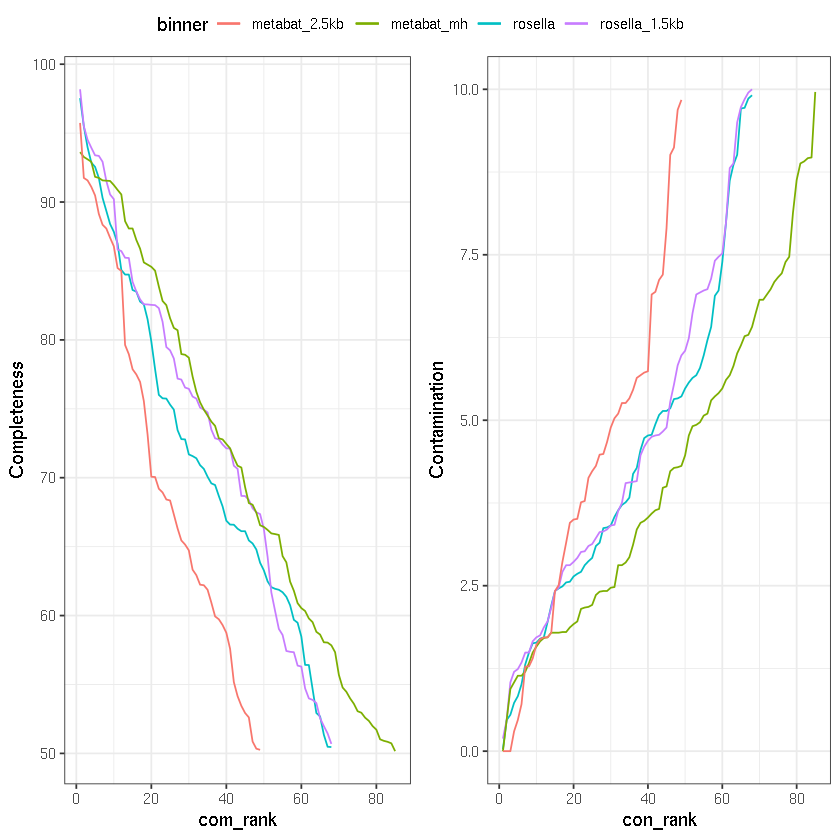

In [9]:
generate_ranks(rosella_mh, 'rosella')
generate_ranks_das(rosella_mh_15, 'rosella_1.5kb')

generate_ranks(metabat_redo, 'metabat')
generate_ranks_das(metabat_mh, 'metabat')
generate_ranks_das(metabat_redo, 'metabat_2.5kb')

metabat_mh[, binner:='metabat_mh']
# generate_ranks(all_bins_ret, 'metabat_sens')
# generate_ranks(all_bins_ret, 'metabat_ssens')
# generate_ranks(all_bins_ret, 'metabat_sspec')
# generate_ranks(all_bins_ret, 'maxbin')
# generate_ranks(all_bins_ret, 'concoct')
# generate_ranks_das(vamb_ret, 'vamb')
# generate_ranks_das(m2_ret, 'redo')
# generate_ranks_das(das_tool_ret, 'DASTool')

# rosella_med[Completeness >= 50 & Contamination <= 10, com_rank:=frank(rosella_med[Completeness >= 50 & Contamination <= 10,], -Completeness, Contamination)]
# rosella_med[Completeness >= 50 & Contamination <= 10, con_rank:=frank(rosella_med[Completeness >= 50 & Contamination <= 10,], Contamination, -Completeness)]

mh_com <- ggplot() + 
    geom_line(data=rosella_mh[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner)) +
    geom_line(data=rosella_mh_15[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner)) +
#     geom_line(data=das_tool_ret[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=metabat_mh[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner)) +
#     geom_line(data=metabat_redo_25[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner)) +
    geom_line(data=metabat_redo[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner))
#     geom_line(data=all_bins_ret[Completeness >= 50 & Contamination <= 10,], aes(x=com_rank, y=Completeness, color=binner)) 

mh_con <- ggplot() + 
    geom_line(data=rosella_mh[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner)) +
    geom_line(data=rosella_mh_15[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner)) +
#     geom_line(data=das_tool_ret[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=metabat_mh[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner)) +
#     geom_line(data=metabat_redo_25[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner)) +
    geom_line(data=metabat_redo[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner))
#     geom_line(data=all_bins_ret[Completeness >= 50 & Contamination <= 10,], aes(x=con_rank, y=Contamination, color=binner)) 

ggarrange(mh_com, mh_con, common.legend=TRUE)